# Activity Recognition with Healthy Older People Using a Batteryless Wearable Sensor

This notebook provides code for loading the [activity recognition dataset](https://archive.ics.uci.edu/dataset/427/activity+recognition+with+healthy+older+people+using+a+batteryless+wearable+sensor) into a suitable format for classification and sequence labelling. 

The code is divided into three sections:
* Loading the data
* Sequence labelling: processing the data into a suitable format for sequence labelling. 
* Classification: processing the data into a suitable format for use with an IID classifier.

We recommend running all three sections, then using the variables produced by the code as required for sequence labelling and IID classification.


## Loading the Data

Run the following cells to load the data from disk. You will need to run code from the subsequent sections (or your own code) to get the data into a suitable format for classification and sequence labelling.  

In [8]:
import os

data_path = "activity_recognition_dataset/S1_Dataset"

files = os.listdir(data_path)
print(files)

['d1p01M', 'd1p02M', 'd1p03M', 'd1p04M', 'd1p05M', 'd1p06M', 'd1p07M', 'd1p08F', 'd1p09F', 'd1p10F', 'd1p11F', 'd1p12F', 'd1p13F', 'd1p14F', 'd1p15F', 'd1p16F', 'd1p17F', 'd1p18F', 'd1p19F', 'd1p20F', 'd1p21F', 'd1p22F', 'd1p23F', 'd1p24F', 'd1p25F', 'd1p26F', 'd1p27F', 'd1p28F', 'd1p29F', 'd1p30F', 'd1p31F', 'd1p32F', 'd1p33F', 'd1p34F', 'd1p35F', 'd1p36M', 'd1p37M', 'd1p38M', 'd1p39M', 'd1p40M', 'd1p41M', 'd1p42M', 'd1p43M', 'd1p44M', 'd1p45M', 'd1p46M', 'd1p47M', 'd1p48M', 'd1p49F', 'd1p50F', 'd1p51F', 'd1p52F', 'd1p53F', 'd1p54F', 'd1p55F', 'd1p56F', 'd1p57F', 'd1p58F', 'd1p59F', 'd1p60F', 'README.txt']


In [9]:
import pandas as pd  # use pandas to load data from CSV files

combined_data = []

for file in files:
    
    if file == "README.txt":
        continue
    
    try:
        # load a single sequence from the file
        seq_dataframe = pd.read_csv(os.path.join(data_path, file), header=None, names=["time", "frontal acc", "vertical acc", "lateral acc", "antenna ID", "RSSI", "phase", "frequency", "label"])
        
        # put the ID of the sequence into the dataframe as an extra column
        seq_dataframe['seqID'] = file  # use filename as ID
                
        combined_data.append(seq_dataframe)  # put the data frame into a list
    except:
        print(f"Could not load file {file}. Skipping.")

print(combined_data)

[       time  frontal acc  vertical acc  lateral acc  antenna ID  RSSI  \
0      0.00      0.27203       1.00820    -0.082102           1 -63.5   
1      0.50      0.27203       1.00820    -0.082102           1 -63.0   
2      1.50      0.44791       0.91636    -0.013684           1 -63.5   
3      1.75      0.44791       0.91636    -0.013684           1 -63.0   
4      2.50      0.34238       0.96229    -0.059296           1 -63.5   
..      ...          ...           ...          ...         ...   ...   
396  251.00      0.87003       0.46851     0.009122           4 -58.5   
397  251.25      0.87003       0.46851     0.009122           1 -57.5   
398  251.50      0.87003       0.46851     0.009122           1 -59.0   
399  253.25     -0.00938       0.95081    -0.116310           1 -58.5   
400  254.00     -0.00938       0.95081    -0.116310           1 -56.5   

       phase  frequency  label   seqID  
0    2.42520     924.25      1  d1p01M  
1    4.73690     921.75      1  d1p01M  

## Sequence Labelling

The following cell creates two variables that you can use for sequence labelling:
* X_by_seq is a list of 2-D numpy arrays. Each numpy array in this list corresponds to on data sequence and contains the input feature values for that sequence.
* y_by_seq is a list of 1-D numpy arrays, where each array contains the target class labels for each sequence. 

In [10]:
import numpy as np

# the pandas dataframe stores data in a table with headers
input_cols = ["frontal acc", "vertical acc", "lateral acc", "RSSI", "phase", "frequency"]  # column headers for the input features
output_col = "label"  # column header for the output label

# get the relevant columns from the pandas dataframes and convert to numpy arrays
X_by_seq = []  # store a list of numpy arrays containing the input features for each sequence
y_by_seq = []  # store a list of 1-D numpy arrays containing the target activity labels for each sequence

for seq_table in combined_data:
    X_by_seq.append(seq_table[input_cols].values)
    y_by_seq.append(seq_table[output_col].values - 1)    # subtract one from the label so that labels start from 0
    
n_states = np.unique(np.concatenate(y_by_seq)).size  # how many classes/states are there?

print(n_states)
print(seq_table)

4
        time  frontal acc  vertical acc  lateral acc  antenna ID  RSSI  \
0      0.000     0.248580       1.05420    -0.241740           1 -45.5   
1      0.025     0.342380       1.18050    -0.116310           1 -45.0   
2      0.250     0.060972       1.07710    -0.036490           1 -44.5   
3      0.300     0.131320       1.05420    -0.082102           1 -49.5   
4      1.500     0.471360       0.90487     0.020525           2 -56.0   
..       ...          ...           ...          ...         ...   ...   
719  485.000     0.330660       0.95081    -0.230340           1 -57.0   
720  485.080     0.330660       0.95081    -0.230340           3 -58.0   
721  485.500     0.330660       0.95081    -0.230340           1 -60.5   
722  488.250     0.119600       0.82449     0.009122           4 -56.0   
723  488.750     0.072698       1.31830     0.009122           4 -56.5   

      phase  frequency  label   seqID  
0    4.4286     920.25      4  d1p60F  
1    4.6234     921.75      4

In [11]:
print("Input features: ", X_by_seq) # list of numpy arrays containing the input features for each sequence

Input features:  [array([[ 2.7203e-01,  1.0082e+00, -8.2102e-02, -6.3500e+01,  2.4252e+00,
         9.2425e+02],
       [ 2.7203e-01,  1.0082e+00, -8.2102e-02, -6.3000e+01,  4.7369e+00,
         9.2175e+02],
       [ 4.4791e-01,  9.1636e-01, -1.3684e-02, -6.3500e+01,  3.0311e+00,
         9.2375e+02],
       ...,
       [ 8.7003e-01,  4.6851e-01,  9.1224e-03, -5.9000e+01,  2.5157e-01,
         9.2475e+02],
       [-9.3803e-03,  9.5081e-01, -1.1631e-01, -5.8500e+01,  3.5282e-01,
         9.2425e+02],
       [-9.3803e-03,  9.5081e-01, -1.1631e-01, -5.6500e+01,  5.1388e+00,
         9.2325e+02]]), array([[-4.4557e-02,  9.3932e-01,  1.1175e-01, -5.8000e+01,  1.7794e-01,
         9.2075e+02],
       [-4.4557e-02,  9.3932e-01,  1.1175e-01, -6.0000e+01,  4.6940e-01,
         9.2025e+02],
       [-4.4557e-02,  9.3932e-01,  1.1175e-01, -6.8500e+01,  1.5033e-01,
         9.2325e+02],
       ...,
       [ 3.4238e-01,  9.7377e-01,  6.6138e-02, -5.8000e+01,  5.9288e+00,
         9.2125e+02],
      

In [12]:
print("Target activity labels: ", y_by_seq) # store a list of 1-D numpy arrays containing the target activity labels for each sequence

Target activity labels:  [array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3,
       0, 0, 0, 0, 2, 2, 

### Variables for sequence labelling

The cell below produces the data you need for sequence labelling... You should be able to work with these variables directly.

In [13]:
from sklearn.model_selection import train_test_split

# create train/test split. Sequences are kept complete.
X_by_seq_tr, X_by_seq_test, y_by_seq_tr, y_by_seq_test = train_test_split(X_by_seq, y_by_seq, test_size=0.2, random_state=21)  # You may wish to make further splits of the data or to modify this split.

You may find the following code useful for creating a sequence labelling model:

In [14]:
# Record which observations occur given each state (activity label)
X_given_y = [[] for _ in range(n_states)]  # empty list where we will record the observations that occur given each activity label

for s, X_seq in enumerate(X_by_seq_tr):
    for i in range(X_seq.shape[0]):
        state_i = y_by_seq_tr[s][i]
        X_given_y[state_i].append(X_seq[i, :][None, :])

In [15]:
from hmmlearn import hmm  # We recommend using this class if builing an HMM

# Record the mean feature values for observations in each state
means = np.zeros((n_states, len(input_cols)))

# Record the variance of feature values for observations in each state
diagonal_covars = np.zeros((n_states, len(input_cols)))

for state in range(n_states):
    means[state] = np.mean(X_given_y[state], axis=0)
    diagonal_covars[state, :] = np.var(X_given_y[state], axis=0)

## IID Classification

In this code, we take the X and y lists produced for sequence labelling, and concatenate the data points for all sequences. This produces a single set of training data and a single set of test data, which are not divided into separate sequences.  

In [16]:
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC

In [17]:
X_tr = np.concatenate(X_by_seq_tr, axis=0)  # combine features into one matrix -- use this as input features for training a classifier
y_tr = np.concatenate(y_by_seq_tr)  # combine target labels into one list -- use this as target labels for training a classifier
print(y_tr)

[3 3 3 ... 3 1 1]


In [18]:
X_test = np.concatenate(X_by_seq_test, axis=0)  # combine features into one matrix -- use this as input features for testing a classifier
y_test = np.concatenate(y_by_seq_test)  # combine target labels into one list -- use this as target labels for evaluating a classifier
print(X_test.shape)
print(y_test.shape)

(5973, 6)
(5973,)


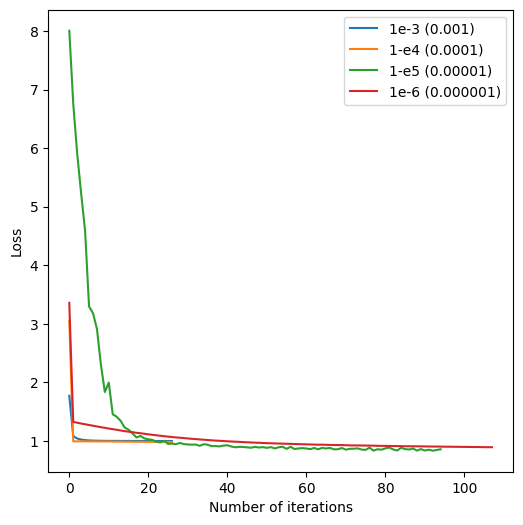

In [100]:
#Changing learning rate
names = ["1e-3 (0.001)", "1-e4 (0.0001)", "1-e5 (0.00001)", "1e-6 (0.000001)"]

classifiers = [
    MLPClassifier(hidden_layer_sizes=(64),
                    activation='relu',
                    solver='sgd',
                    alpha=0,
                    learning_rate_init=1e-3,
                    max_iter=1000,
                    n_iter_no_change=25,
                    random_state=1,
                    early_stopping=True), 

    MLPClassifier(
                    hidden_layer_sizes=(64),
                    activation='relu',
                    solver='sgd',
                    alpha=0,
                    learning_rate_init=1e-4,
                    max_iter=1000,
                    n_iter_no_change=25,
                    random_state=1,
                    early_stopping=True
                    ),

    MLPClassifier(hidden_layer_sizes=(64),
                    activation='relu',
                    solver='sgd',
                    alpha=0,
                    learning_rate_init=1e-5,
                    max_iter=1000,
                    n_iter_no_change=25,
                    random_state=1,
                    early_stopping=True),

    MLPClassifier(hidden_layer_sizes=(64),
                    activation='relu',
                    solver='sgd',
                    alpha=0,
                    learning_rate_init=1e-6,
                    max_iter=1000,
                    n_iter_no_change=25,
                    random_state=1,
                    early_stopping=True)]

figure = plt.figure(figsize=(6, 6))
for i, clf in enumerate(classifiers):
    clf.fit(X_tr, y_tr)
    plt.plot(clf.loss_curve_, label=names[i])
    plt.legend() 
    plt.xlabel('Number of iterations')
    plt.ylabel('Loss')

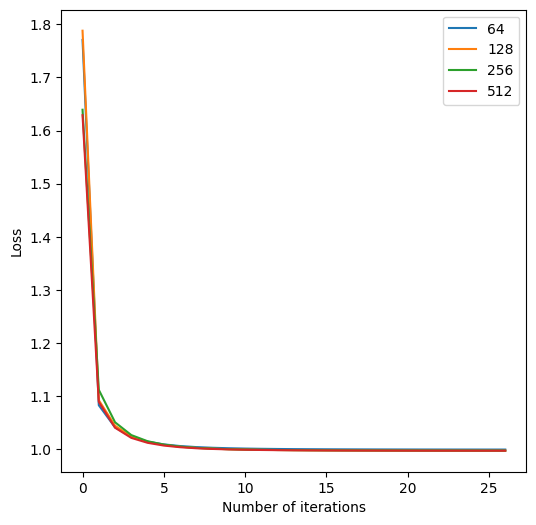

In [101]:
#Changing hidden layer size
names = ["64", "128", "256", "512"]
              
classifiers = [ 
    MLPClassifier(hidden_layer_sizes=(64),
                    activation='relu',
                    solver='sgd',
                    alpha=0,
                    learning_rate_init=1e-3,
                    max_iter=1000,
                    n_iter_no_change=25,
                    random_state=1,
                    early_stopping=True), 

    MLPClassifier(
                    hidden_layer_sizes=(128),
                    activation='relu',
                    solver='sgd',
                    alpha=0,
                    learning_rate_init=1e-3,
                    max_iter=1000,
                    n_iter_no_change=25,
                    random_state=1,
                    early_stopping=True
                    ),

    MLPClassifier(hidden_layer_sizes=(256),
                    activation='relu',
                    solver='sgd',
                    alpha=0,
                    learning_rate_init=1e-3,
                    max_iter=1000,
                    n_iter_no_change=25,
                    random_state=1,
                    early_stopping=True),

    MLPClassifier(hidden_layer_sizes=(512),
                    activation='relu',
                    solver='sgd',
                    alpha=0,
                    learning_rate_init=1e-3,
                    max_iter=1000,
                    n_iter_no_change=25,
                    random_state=1,
                    early_stopping=True)]

# figure = plt.figure(figsize=(20, 5))
# for i, clf in enumerate(classifiers):
    
    # ax = plt.subplot(1, len(classifiers), i+1)
    
    # clf.fit(X_tr, y_tr)
    # ax.plot(clf.loss_curve_, label="loss curve")
    # ax.legend() 
    # ax.set_xlabel('Number of iterations')
    # ax.set_ylabel('Loss')
    
    # ax.set_title(names[i])
    # print(f'{names[i]} Training accuracy: ', clf.score(X_tr, y_tr))
    # print(f'{names[i]} Testing accuracy: ', clf.score(X_test, y_test))
    # print()

# plt.tight_layout()
# plt.show()

figure = plt.figure(figsize=(6, 6))
for i, clf in enumerate(classifiers):
    clf.fit(X_tr, y_tr)
    plt.plot(clf.loss_curve_, label=names[i])
    plt.legend() 
    plt.xlabel('Number of iterations')
    plt.ylabel('Loss')


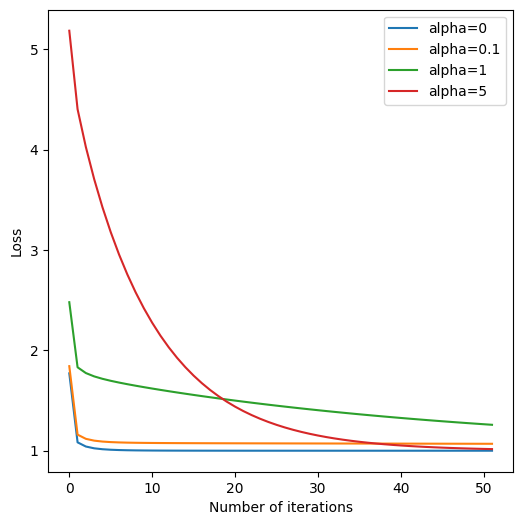

In [106]:
#Changing alpha value
names = ["alpha=0", "alpha=0.1", "alpha=1", "alpha=5"]
              
classifiers = [ 
    MLPClassifier(hidden_layer_sizes=(64),
                    activation='relu',
                    solver='sgd',
                    alpha=0,
                    learning_rate_init=1e-3,
                    max_iter=1000,
                    n_iter_no_change=50,
                    random_state=1,
                    early_stopping=True), 

    MLPClassifier(
                    hidden_layer_sizes=(64),
                    activation='relu',
                    solver='sgd',
                    alpha=0.1,
                    learning_rate_init=1e-3,
                    max_iter=1000,
                    n_iter_no_change=50,
                    random_state=1,
                    early_stopping=True
                    ),

    MLPClassifier(hidden_layer_sizes=(64),
                    activation='relu',
                    solver='sgd',
                    alpha=1,
                    learning_rate_init=1e-3,
                    max_iter=1000,
                    n_iter_no_change=50,
                    random_state=1,
                    early_stopping=True),

    MLPClassifier(hidden_layer_sizes=(64),
                    activation='relu',
                    solver='sgd',
                    alpha=5,
                    learning_rate_init=1e-3,
                    max_iter=1000,
                    n_iter_no_change=50,
                    random_state=1,
                    early_stopping=True)]

# figure = plt.figure(figsize=(20, 5))
# for i, clf in enumerate(classifiers):
    
#     ax = plt.subplot(1, len(classifiers), i+1)
    
#     clf.fit(X_tr, y_tr)
#     ax.plot(clf.loss_curve_, label="loss curve")
#     ax.legend() 
#     ax.set_xlabel('Number of iterations')
#     ax.set_ylabel('Loss')
    
#     ax.set_title(names[i])
#     print(f'{names[i]} Training accuracy: ', clf.score(X_tr, y_tr))
#     print(f'{names[i]} Testing accuracy: ', clf.score(X_test, y_test))
#     print()

# plt.tight_layout()
# plt.show()

figure = plt.figure(figsize=(6, 6))
for i, clf in enumerate(classifiers):
    clf.fit(X_tr, y_tr)
    plt.plot(clf.loss_curve_, label=names[i])
    plt.legend() 
    plt.xlabel('Number of iterations')
    plt.ylabel('Loss')


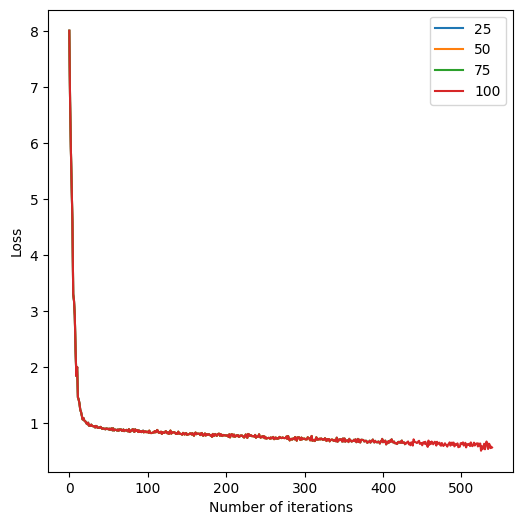

In [117]:
#Changing n_iter_no_change value
names = ["25", "50", "75", "100"]
              
classifiers = [ 
    MLPClassifier(hidden_layer_sizes=(64),
                    activation='relu',
                    solver='sgd',
                    alpha=0,
                    learning_rate_init=1e-5,
                    max_iter=1000,
                    n_iter_no_change=25,
                    random_state=1,
                    early_stopping=True), 

    MLPClassifier(
                    hidden_layer_sizes=(64),
                    activation='relu',
                    solver='sgd',
                    alpha=0,
                    learning_rate_init=1e-5,
                    max_iter=1000,
                    n_iter_no_change=50,
                    random_state=1,
                    early_stopping=True
                    ),

    MLPClassifier(hidden_layer_sizes=(64),
                    activation='relu',
                    solver='sgd',
                    alpha=0,
                    learning_rate_init=1e-5,
                    max_iter=1000,
                    n_iter_no_change=75,
                    random_state=1,
                    early_stopping=True),

    MLPClassifier(hidden_layer_sizes=(64),
                    activation='relu',
                    solver='sgd',
                    alpha=0,
                    learning_rate_init=1e-5,
                    max_iter=1000,
                    n_iter_no_change=100,
                    random_state=1,
                    early_stopping=True)]

# figure = plt.figure(figsize=(20, 5))
# for i, clf in enumerate(classifiers):
    
#     ax = plt.subplot(1, len(classifiers), i+1)
    
#     clf.fit(X_tr, y_tr)
#     ax.plot(clf.loss_curve_, label="loss curve")
#     ax.legend() 
#     ax.set_xlabel('Number of iterations')
#     ax.set_ylabel('Loss')
    
#     ax.set_title(names[i])
#     print(f'{names[i]} Training accuracy: ', clf.score(X_tr, y_tr))
#     print(f'{names[i]} Testing accuracy: ', clf.score(X_test, y_test))
#     print()

# plt.tight_layout()
# plt.show()

figure = plt.figure(figsize=(6, 6))
for i, clf in enumerate(classifiers):
    clf.fit(X_tr, y_tr)
    plt.plot(clf.loss_curve_, label=names[i])
    plt.legend() 
    plt.xlabel('Number of iterations')
    plt.ylabel('Loss')

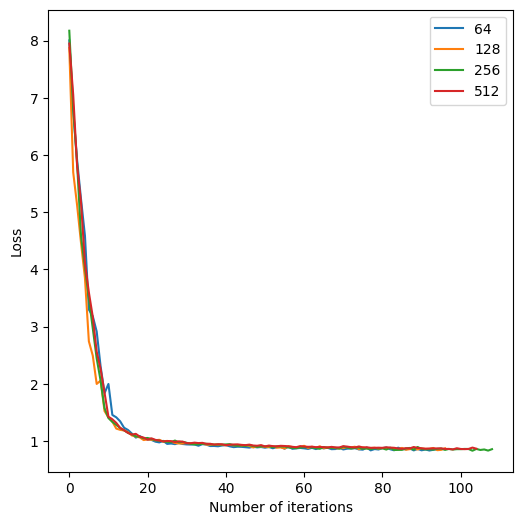

In [118]:
#Changing hidden layer size
names = ["64", "128", "256", "512"]
              
classifiers = [ 
    MLPClassifier(hidden_layer_sizes=(64),
                    activation='relu',
                    solver='sgd',
                    alpha=0,
                    learning_rate_init=1e-5,
                    max_iter=1000,
                    n_iter_no_change=25,
                    random_state=1,
                    early_stopping=True), 

    MLPClassifier(
                    hidden_layer_sizes=(128),
                    activation='relu',
                    solver='sgd',
                    alpha=0,
                    learning_rate_init=1e-5,
                    max_iter=1000,
                    n_iter_no_change=25,
                    random_state=1,
                    early_stopping=True
                    ),

    MLPClassifier(hidden_layer_sizes=(256),
                    activation='relu',
                    solver='sgd',
                    alpha=0,
                    learning_rate_init=1e-5,
                    max_iter=1000,
                    n_iter_no_change=25,
                    random_state=1,
                    early_stopping=True),

    MLPClassifier(hidden_layer_sizes=(512),
                    activation='relu',
                    solver='sgd',
                    alpha=0,
                    learning_rate_init=1e-5,
                    max_iter=1000,
                    n_iter_no_change=25,
                    random_state=1,
                    early_stopping=True)]

# figure = plt.figure(figsize=(20, 5))
# for i, clf in enumerate(classifiers):
    
    # ax = plt.subplot(1, len(classifiers), i+1)
    
    # clf.fit(X_tr, y_tr)
    # ax.plot(clf.loss_curve_, label="loss curve")
    # ax.legend() 
    # ax.set_xlabel('Number of iterations')
    # ax.set_ylabel('Loss')
    
    # ax.set_title(names[i])
    # print(f'{names[i]} Training accuracy: ', clf.score(X_tr, y_tr))
    # print(f'{names[i]} Testing accuracy: ', clf.score(X_test, y_test))
    # print()

# plt.tight_layout()
# plt.show()

figure = plt.figure(figsize=(6, 6))
for i, clf in enumerate(classifiers):
    clf.fit(X_tr, y_tr)
    plt.plot(clf.loss_curve_, label=names[i])
    plt.legend() 
    plt.xlabel('Number of iterations')
    plt.ylabel('Loss')

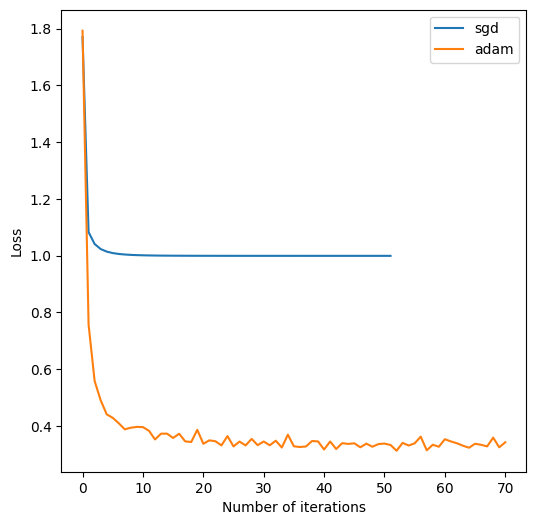

In [113]:
#Changing solver
names = ["sgd", "adam", "Neural Net3", "Neural Net4"]
              
classifiers = [ 
    MLPClassifier(hidden_layer_sizes=(64),
                    activation='relu',
                    solver='sgd',
                    alpha=0,
                    learning_rate_init=1e-3,
                    max_iter=1000,
                    n_iter_no_change=50,
                    random_state=1,
                    early_stopping=True), 

    MLPClassifier(
                    hidden_layer_sizes=(64),
                    activation='relu',
                    solver='adam',
                    alpha=0,
                    learning_rate_init=1e-3,
                    max_iter=1000,
                    n_iter_no_change=50,
                    random_state=1,
                    early_stopping=True
                    )]

# figure = plt.figure(figsize=(20, 5))
# for i, clf in enumerate(classifiers):
    
#     ax = plt.subplot(1, len(classifiers), i+1)
    
#     clf.fit(X_tr, y_tr)
#     ax.plot(clf.loss_curve_, label="loss curve")
#     ax.legend() 
#     ax.set_xlabel('Number of iterations')
#     ax.set_ylabel('Loss')
    
#     ax.set_title(names[i])
#     print(f'{names[i]} Training accuracy: ', clf.score(X_tr, y_tr))
#     print(f'{names[i]} Testing accuracy: ', clf.score(X_test, y_test))
#     print()

# plt.tight_layout()
# plt.show()
figure = plt.figure(figsize=(6, 6))
for i, clf in enumerate(classifiers):
    clf.fit(X_tr, y_tr)
    plt.plot(clf.loss_curve_, label=names[i])
    plt.legend() 
    plt.xlabel('Number of iterations')
    plt.ylabel('Loss')

Neural Net1 Training accuracy:  0.8987722806338558
Neural Net1 Testing accuracy:  0.8965344048216977

Neural Net2 Training accuracy:  0.9029865187383087
Neural Net2 Testing accuracy:  0.9105976896032144

Neural Net3 Training accuracy:  0.8919133931067106
Neural Net3 Testing accuracy:  0.9116022099447514

Neural Net4 Training accuracy:  0.8571244275301555
Neural Net4 Testing accuracy:  0.8898376025447848



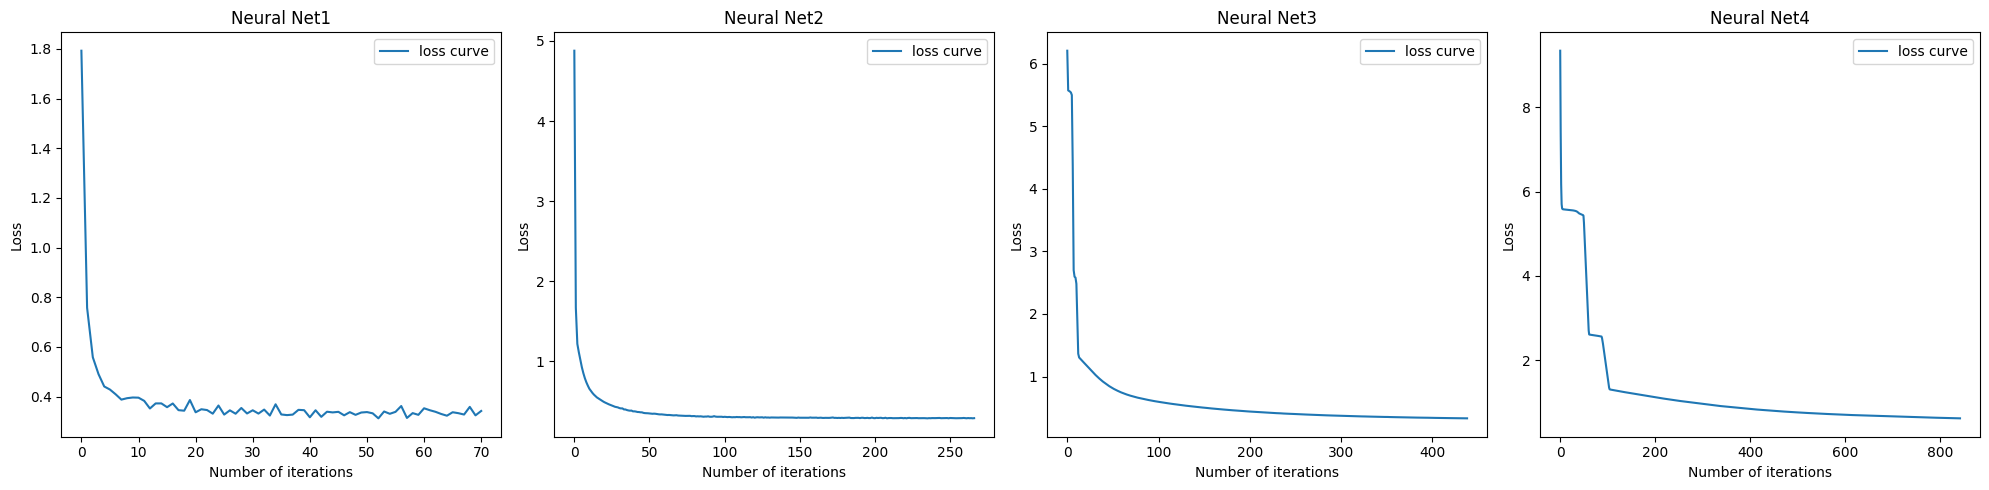

In [37]:
#Changing adam learning rate
names = ["Neural Net1", "Neural Net2", "Neural Net3", "Neural Net4"]
              
classifiers = [ 
    MLPClassifier(hidden_layer_sizes=(64),
                    activation='relu',
                    solver='adam',
                    alpha=0,
                    learning_rate_init=1e-3,
                    max_iter=1000,
                    n_iter_no_change=50,
                    random_state=1,
                    early_stopping=True), 

    MLPClassifier(
                    hidden_layer_sizes=(64),
                    activation='relu',
                    solver='adam',
                    alpha=0,
                    learning_rate_init=1e-4,
                    max_iter=1000,
                    n_iter_no_change=50,
                    random_state=1,
                    early_stopping=True
                    ),
    MLPClassifier(
                    hidden_layer_sizes=(64),
                    activation='relu',
                    solver='adam',
                    alpha=0,
                    learning_rate_init=1e-5,
                    max_iter=1000,
                    n_iter_no_change=50,
                    random_state=1,
                    early_stopping=True
                    ),
    MLPClassifier(
                    hidden_layer_sizes=(64),
                    activation='relu',
                    solver='adam',
                    alpha=0,
                    learning_rate_init=1e-6,
                    max_iter=1000,
                    n_iter_no_change=50,
                    random_state=1,
                    early_stopping=True
                    )]

figure = plt.figure(figsize=(20, 5))
for i, clf in enumerate(classifiers):
    
    ax = plt.subplot(1, len(classifiers), i+1)
    
    clf.fit(X_tr, y_tr)
    ax.plot(clf.loss_curve_, label="loss curve")
    ax.legend() 
    ax.set_xlabel('Number of iterations')
    ax.set_ylabel('Loss')
    
    ax.set_title(names[i])
    print(f'{names[i]} Training accuracy: ', clf.score(X_tr, y_tr))
    print(f'{names[i]} Testing accuracy: ', clf.score(X_test, y_test))
    print()

plt.tight_layout()
plt.show()

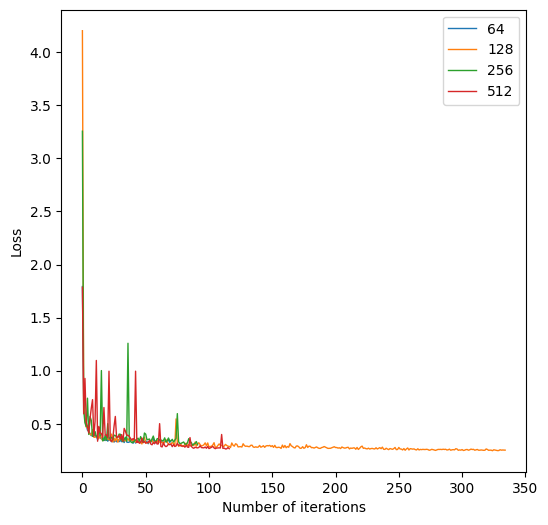

In [114]:
#Changing adam hidden layer size 
names = ["64", "128", "256", "512"]
              
classifiers = [ 
    MLPClassifier(hidden_layer_sizes=(64),
                    activation='relu',
                    solver='adam',
                    alpha=0,
                    learning_rate_init=1e-3,
                    max_iter=1000,
                    n_iter_no_change=50,
                    random_state=1,
                    early_stopping=True), 

    MLPClassifier(
                    hidden_layer_sizes=(128),
                    activation='relu',
                    solver='adam',
                    alpha=0,
                    learning_rate_init=1e-3,
                    max_iter=1000,
                    n_iter_no_change=50,
                    random_state=1,
                    early_stopping=True
                    ),
    MLPClassifier(
                    hidden_layer_sizes=(256),
                    activation='relu',
                    solver='adam',
                    alpha=0,
                    learning_rate_init=1e-3,
                    max_iter=1000,
                    n_iter_no_change=50,
                    random_state=1,
                    early_stopping=True
                    ),
    MLPClassifier(
                    hidden_layer_sizes=(512),
                    activation='relu',
                    solver='adam',
                    alpha=0,
                    learning_rate_init=1e-3,
                    max_iter=1000,
                    n_iter_no_change=50,
                    random_state=1,
                    early_stopping=True
                    )]

# figure = plt.figure(figsize=(20, 5))
# for i, clf in enumerate(classifiers):
    
#     ax = plt.subplot(1, len(classifiers), i+1)
    
#     clf.fit(X_tr, y_tr)
#     ax.plot(clf.loss_curve_, label="loss curve")
#     ax.legend() 
#     ax.set_xlabel('Number of iterations')
#     ax.set_ylabel('Loss')
    
#     ax.set_title(names[i])
#     print(f'{names[i]} Training accuracy: ', clf.score(X_tr, y_tr))
#     print(f'{names[i]} Testing accuracy: ', clf.score(X_test, y_test))
#     print()

# plt.tight_layout()
# plt.show()

figure = plt.figure(figsize=(6, 6))
for i, clf in enumerate(classifiers):
    clf.fit(X_tr, y_tr)
    plt.plot(clf.loss_curve_, label=names[i], linewidth=1)
    plt.legend() 
    plt.xlabel('Number of iterations')
    plt.ylabel('Loss')

Neural Net1 Training accuracy:  0.8987722806338558
Neural Net1 Testing accuracy:  0.8965344048216977

Neural Net2 Training accuracy:  0.8987722806338558
Neural Net2 Testing accuracy:  0.8965344048216977

Neural Net3 Training accuracy:  0.9114579973768518
Neural Net3 Testing accuracy:  0.9039008873263017

Neural Net4 Training accuracy:  0.9141241480143628
Neural Net4 Testing accuracy:  0.8982086053909258



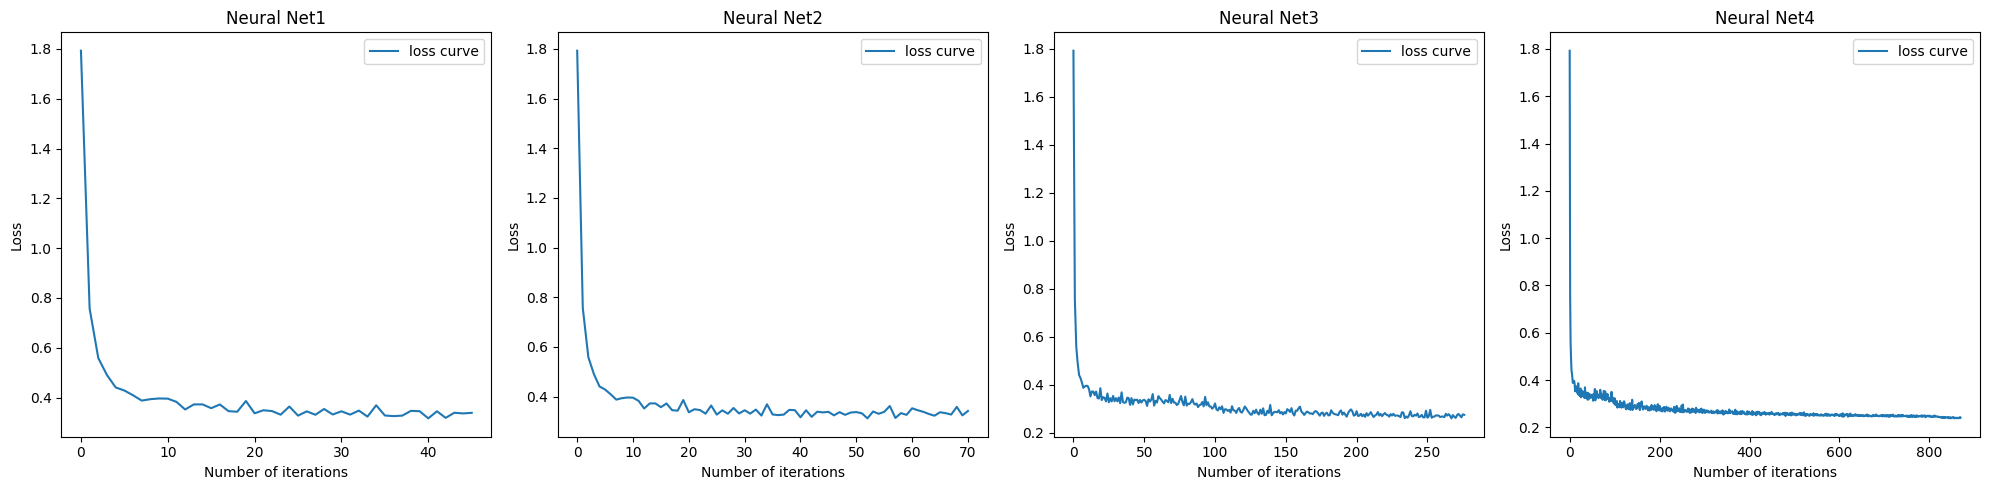

In [40]:
#Changing adam learning rate
names = ["Neural Net1", "Neural Net2", "Neural Net3", "Neural Net4"]
              
classifiers = [ 
    MLPClassifier(hidden_layer_sizes=(64),
                    activation='relu',
                    solver='adam',
                    alpha=0,
                    learning_rate_init=1e-3,
                    max_iter=1000,
                    n_iter_no_change=25,
                    random_state=1,
                    early_stopping=True), 

    MLPClassifier(
                    hidden_layer_sizes=(64),
                    activation='relu',
                    solver='adam',
                    alpha=0,
                    learning_rate_init=1e-3,
                    max_iter=1000,
                    n_iter_no_change=50,
                    random_state=1,
                    early_stopping=True
                    ),
    MLPClassifier(
                    hidden_layer_sizes=(64),
                    activation='relu',
                    solver='adam',
                    alpha=0,
                    learning_rate_init=1e-3,
                    max_iter=1000,
                    n_iter_no_change=75,
                    random_state=1,
                    early_stopping=True
                    ),
    MLPClassifier(
                    hidden_layer_sizes=(64),
                    activation='relu',
                    solver='adam',
                    alpha=0,
                    learning_rate_init=1e-3,
                    max_iter=1000,
                    n_iter_no_change=100,
                    random_state=1,
                    early_stopping=True
                    )]

figure = plt.figure(figsize=(20, 5))
for i, clf in enumerate(classifiers):
    
    ax = plt.subplot(1, len(classifiers), i+1)
    
    clf.fit(X_tr, y_tr)
    ax.plot(clf.loss_curve_, label="loss curve")
    ax.legend() 
    ax.set_xlabel('Number of iterations')
    ax.set_ylabel('Loss')
    
    ax.set_title(names[i])
    print(f'{names[i]} Training accuracy: ', clf.score(X_tr, y_tr))
    print(f'{names[i]} Testing accuracy: ', clf.score(X_test, y_test))
    print()

plt.tight_layout()
plt.show()

Neural Net1 Training accuracy:  0.8987722806338558
Neural Net1 Testing accuracy:  0.8965344048216977

Neural Net2 Training accuracy:  0.8987722806338558
Neural Net2 Testing accuracy:  0.8965344048216977

Neural Net3 Training accuracy:  0.8987722806338558
Neural Net3 Testing accuracy:  0.8965344048216977

Neural Net4 Training accuracy:  0.8987722806338558
Neural Net4 Testing accuracy:  0.8965344048216977



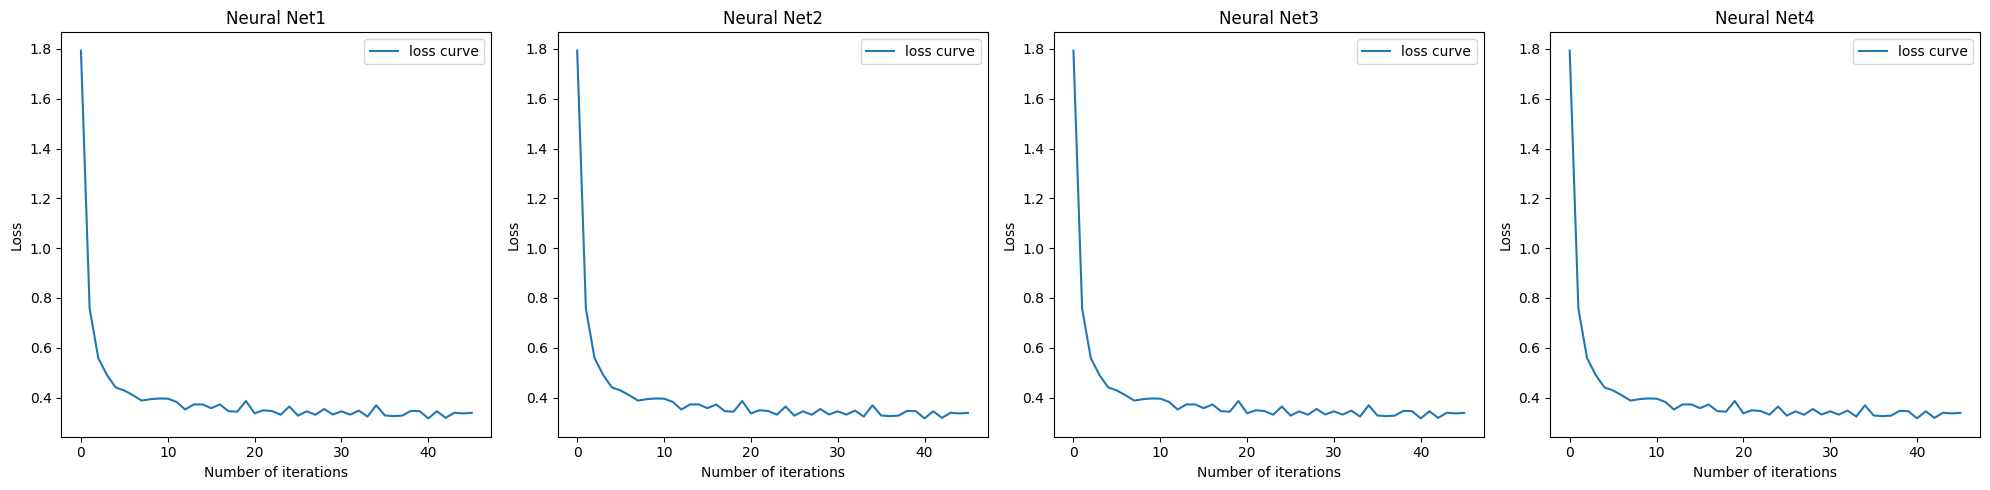

In [73]:
#Changing adam learning rate
names = ["Neural Net1", "Neural Net2", "Neural Net3", "Neural Net4"]
              
classifiers = [ 
    MLPClassifier(hidden_layer_sizes=(64),
                    activation='relu',
                    solver='adam',
                    alpha=0,
                    learning_rate_init=1e-3,
                    max_iter=100,
                    n_iter_no_change=25,
                    random_state=1,
                    early_stopping=True), 

    MLPClassifier(
                    hidden_layer_sizes=(64),
                    activation='relu',
                    solver='adam',
                    alpha=0,
                    learning_rate_init=1e-3,
                    max_iter=500,
                    n_iter_no_change=25,
                    random_state=1,
                    early_stopping=True
                    ),
    MLPClassifier(
                    hidden_layer_sizes=(64),
                    activation='relu',
                    solver='adam',
                    alpha=0,
                    learning_rate_init=1e-3,
                    max_iter=2500,
                    n_iter_no_change=25,
                    random_state=1,
                    early_stopping=True
                    ),
    MLPClassifier(
                    hidden_layer_sizes=(64),
                    activation='relu',
                    solver='adam',
                    alpha=0,
                    learning_rate_init=1e-3,
                    max_iter=5000,
                    n_iter_no_change=25,
                    random_state=1,
                    early_stopping=True
                    )]

figure = plt.figure(figsize=(20, 5))
for i, clf in enumerate(classifiers):
    
    ax = plt.subplot(1, len(classifiers), i+1)
    
    clf.fit(X_tr, y_tr)
    ax.plot(clf.loss_curve_, label="loss curve")
    ax.legend() 
    ax.set_xlabel('Number of iterations')
    ax.set_ylabel('Loss')
    
    ax.set_title(names[i])
    print(f'{names[i]} Training accuracy: ', clf.score(X_tr, y_tr))
    print(f'{names[i]} Testing accuracy: ', clf.score(X_test, y_test))
    print()

plt.tight_layout()
plt.show()

Neural Net1 Training accuracy:  0.6009374529660926
Neural Net1 Testing accuracy:  0.5079524527038339

Neural Net2 Training accuracy:  0.6009374529660926
Neural Net2 Testing accuracy:  0.5079524527038339

Neural Net3 Training accuracy:  0.6009374529660926
Neural Net3 Testing accuracy:  0.5079524527038339

Neural Net4 Training accuracy:  0.6009374529660926
Neural Net4 Testing accuracy:  0.5079524527038339



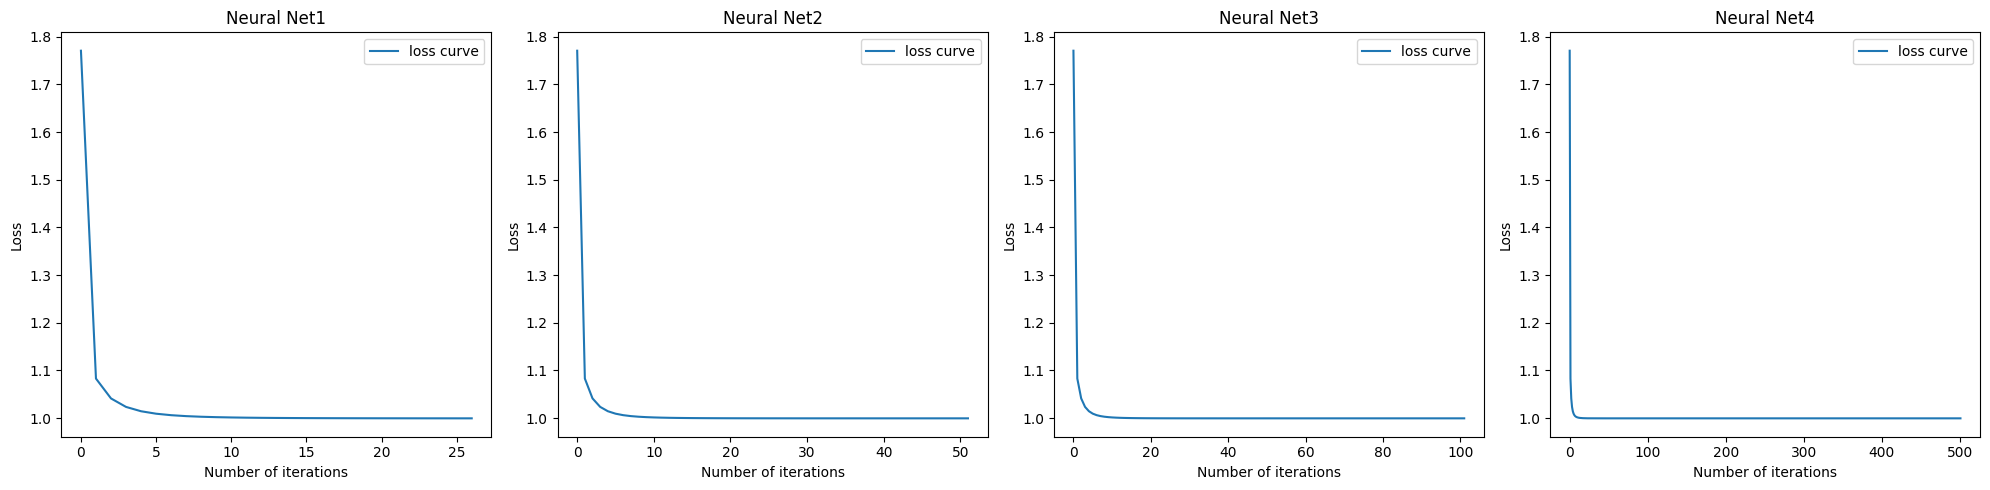

In [ ]:
#Changing n_iter_no_change value
names = ["Neural Net1", "Neural Net2", "Neural Net3", "Neural Net4"]
              
classifiers = [ 
    MLPClassifier(hidden_layer_sizes=(64),
                    activation='relu',
                    solver='sgd',
                    alpha=0,
                    learning_rate_init=1e-3,
                    max_iter=1000,
                    n_iter_no_change=25,
                    random_state=1,
                    early_stopping=True), 

    MLPClassifier(
                    hidden_layer_sizes=(64),
                    activation='relu',
                    solver='sgd',
                    alpha=0,
                    learning_rate_init=1e-3,
                    max_iter=2500,
                    n_iter_no_change=50,
                    random_state=1,
                    early_stopping=True
                    ),

    MLPClassifier(hidden_layer_sizes=(64),
                    activation='relu',
                    solver='sgd',
                    alpha=0,
                    learning_rate_init=1e-3,
                    max_iter=5000,
                    n_iter_no_change=100,
                    random_state=1,
                    early_stopping=True),

    MLPClassifier(hidden_layer_sizes=(64),
                    activation='relu',
                    solver='sgd',
                    alpha=0,
                    learning_rate_init=1e-3,
                    max_iter=10000,
                    n_iter_no_change=500,
                    random_state=1,
                    early_stopping=True)]

figure = plt.figure(figsize=(20, 5))
for i, clf in enumerate(classifiers):
    
    ax = plt.subplot(1, len(classifiers), i+1)
    
    clf.fit(X_tr, y_tr)
    ax.plot(clf.loss_curve_, label="loss curve")
    ax.legend() 
    ax.set_xlabel('Number of iterations')
    ax.set_ylabel('Loss')
    
    ax.set_title(names[i])
    print(f'{names[i]} Training accuracy: ', clf.score(X_tr, y_tr))
    print(f'{names[i]} Testing accuracy: ', clf.score(X_test, y_test))
    print()

plt.tight_layout()
plt.show()

Neural Net1 Training accuracy:  0.8987722806338558
Neural Net1 Testing accuracy:  0.8965344048216977

Neural Net2 Training accuracy:  0.9015674385602787
Neural Net2 Testing accuracy:  0.9020592667001507

Neural Net3 Training accuracy:  0.8996538304414199
Neural Net3 Testing accuracy:  0.8926837435124728

Neural Net4 Training accuracy:  0.8988152830634931
Neural Net4 Testing accuracy:  0.910095429432446



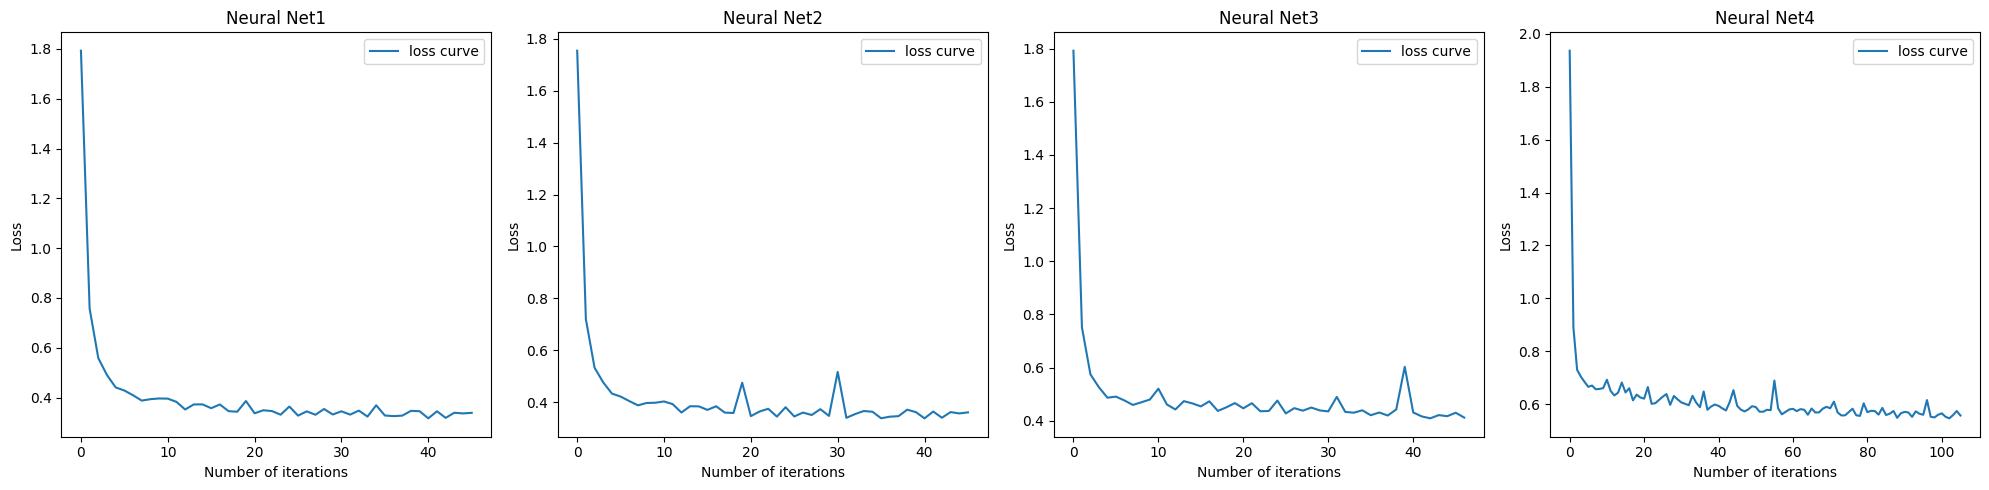

In [76]:
#Changing adam learning rate
names = ["Neural Net1", "Neural Net2", "Neural Net3", "Neural Net4"]
              
classifiers = [ 
    MLPClassifier(hidden_layer_sizes=(64),
                    activation='relu',
                    solver='adam',
                    alpha=0,
                    learning_rate_init=1e-3,
                    max_iter=1000,
                    n_iter_no_change=25,
                    random_state=1,
                    early_stopping=True), 

    MLPClassifier(
                    hidden_layer_sizes=(64),
                    activation='relu',
                    solver='adam',
                    alpha=0.1,
                    learning_rate_init=1e-3,
                    max_iter=1000,
                    n_iter_no_change=25,
                    random_state=1,
                    early_stopping=True
                    ),
    MLPClassifier(
                    hidden_layer_sizes=(64),
                    activation='relu',
                    solver='adam',
                    alpha=1,
                    learning_rate_init=1e-3,
                    max_iter=1000,
                    n_iter_no_change=25,
                    random_state=1,
                    early_stopping=True
                    ),
    MLPClassifier(
                    hidden_layer_sizes=(64),
                    activation='relu',
                    solver='adam',
                    alpha=5,
                    learning_rate_init=1e-3,
                    max_iter=1000,
                    n_iter_no_change=25,
                    random_state=1,
                    early_stopping=True
                    )]

figure = plt.figure(figsize=(20, 5))
for i, clf in enumerate(classifiers):
    
    ax = plt.subplot(1, len(classifiers), i+1)
    
    clf.fit(X_tr, y_tr)
    ax.plot(clf.loss_curve_, label="loss curve")
    ax.legend() 
    ax.set_xlabel('Number of iterations')
    ax.set_ylabel('Loss')
    
    ax.set_title(names[i])
    print(f'{names[i]} Training accuracy: ', clf.score(X_tr, y_tr))
    print(f'{names[i]} Testing accuracy: ', clf.score(X_test, y_test))
    print()

plt.tight_layout()
plt.show()

Training accuracy:  0.9096733965469049
Testing accuracy:  0.9060773480662984


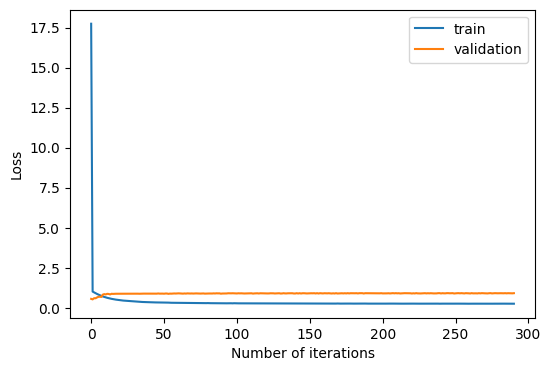

In [44]:
nn_clf = MLPClassifier(hidden_layer_sizes=(128),
                    activation='relu',
                    solver='adam',
                    alpha=0,
                    learning_rate_init=1e-4,
                    max_iter=1000,
                    n_iter_no_change=50,
                    random_state=1,
                    early_stopping=True)
nn_clf.fit(X_tr, y_tr)

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(nn_clf.loss_curve_,label="train")
ax.plot(nn_clf.validation_scores_,label="validation")
ax.legend() 
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Loss')

print('Training accuracy: ', nn_clf.score(X_tr, y_tr))
print('Testing accuracy: ', nn_clf.score(X_test, y_test))

Training accuracy:  0.8920854028252596
Testing accuracy:  0.9095931692616775


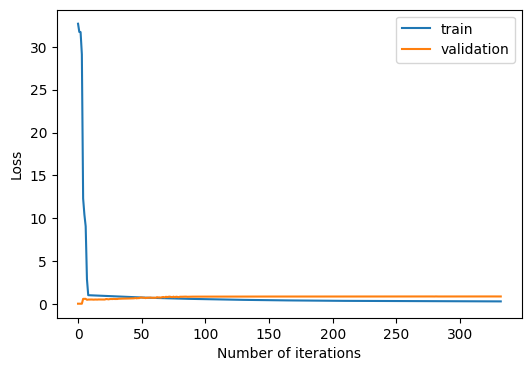

In [45]:
nn_clf = MLPClassifier(hidden_layer_sizes=(128),
                    activation='relu',
                    solver='adam',
                    alpha=0,
                    learning_rate_init=1e-5,
                    max_iter=1000,
                    n_iter_no_change=50,
                    random_state=1,
                    early_stopping=True)
nn_clf.fit(X_tr, y_tr)

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(nn_clf.loss_curve_,label="train")
ax.plot(nn_clf.validation_scores_,label="validation")
ax.legend() 
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Loss')

print('Training accuracy: ', nn_clf.score(X_tr, y_tr))
print('Testing accuracy: ', nn_clf.score(X_test, y_test))

Training accuracy:  0.8919133931067106
Testing accuracy:  0.9116022099447514


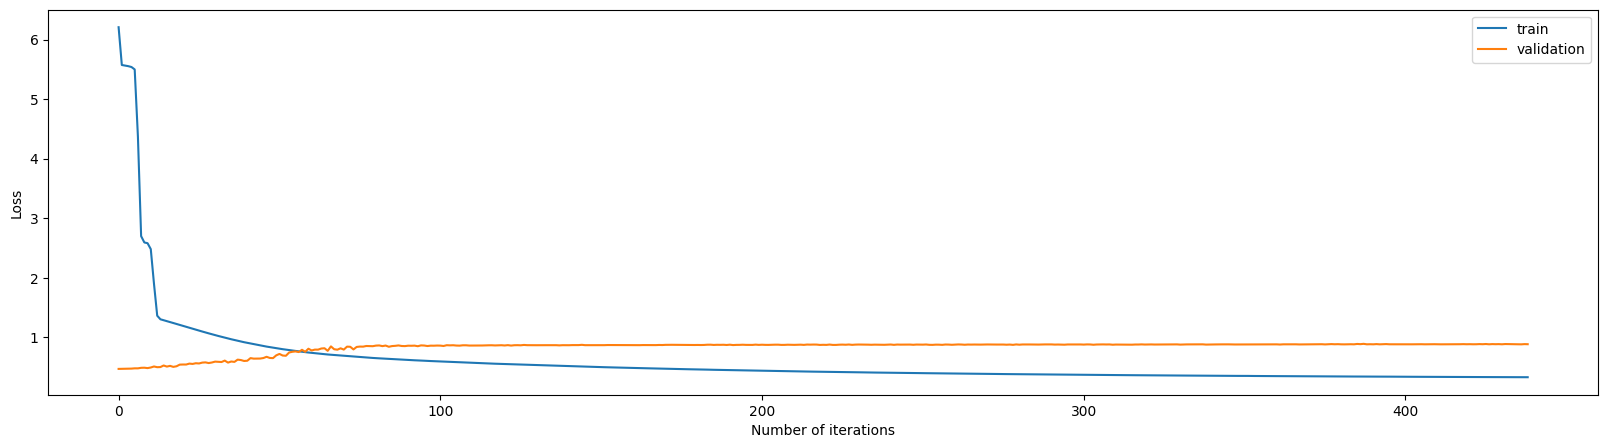

In [47]:
nn_clf = MLPClassifier(hidden_layer_sizes=(64),
                    activation='relu',
                    solver='adam',
                    alpha=0,
                    learning_rate_init=1e-5,
                    max_iter=1000,
                    n_iter_no_change=50,
                    random_state=1,
                    early_stopping=True)
nn_clf.fit(X_tr, y_tr)

fig, ax = plt.subplots(figsize=(20,5))
ax.plot(nn_clf.loss_curve_,label="train")
ax.plot(nn_clf.validation_scores_,label="validation")
ax.legend() 
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Loss')

print('Training accuracy: ', nn_clf.score(X_tr, y_tr))
print('Testing accuracy: ', nn_clf.score(X_test, y_test))

Training accuracy:  0.8672945021393709
Testing accuracy:  0.8913443830570903


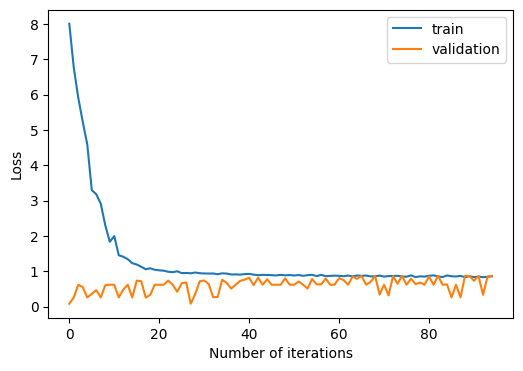

In [23]:
nn_clf = MLPClassifier(hidden_layer_sizes=(64),
                    activation='relu',
                    solver='sgd',
                    alpha=0,
                    learning_rate_init=1e-5,
                    max_iter=1000,
                    n_iter_no_change=25,
                    random_state=1,
                    early_stopping=True)
nn_clf.fit(X_tr, y_tr)

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(nn_clf.loss_curve_,label="train")
ax.plot(nn_clf.validation_scores_,label="validation")
ax.legend() 
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Loss')

print('Training accuracy: ', nn_clf.score(X_tr, y_tr))
print('Testing accuracy: ', nn_clf.score(X_test, y_test))

Training accuracy:  0.87
Testing accuracy:  0.89


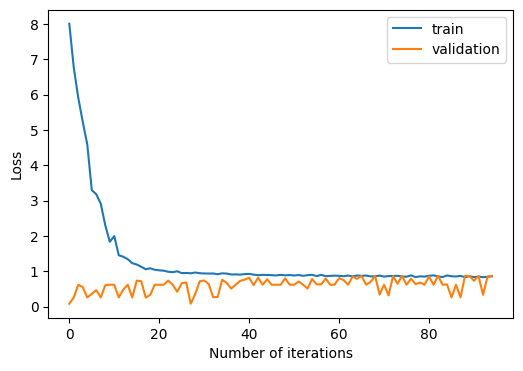

In [69]:
nn_clf = MLPClassifier(hidden_layer_sizes=(64),
                    activation='relu',
                    solver='sgd',
                    alpha=0,
                    learning_rate_init=1e-5,
                    max_iter=1000,
                    n_iter_no_change=25,
                    random_state=1,
                    early_stopping=True)
nn_clf.fit(X_tr, y_tr)

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(nn_clf.loss_curve_,label="train")
ax.plot(nn_clf.validation_scores_,label="validation")
ax.legend() 
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Loss')

print('Training accuracy: ', round(nn_clf.score(X_tr, y_tr), 2))
print('Testing accuracy: ', round(nn_clf.score(X_test, y_test), 2))

Training accuracy:  0.87
Testing accuracy:  0.9


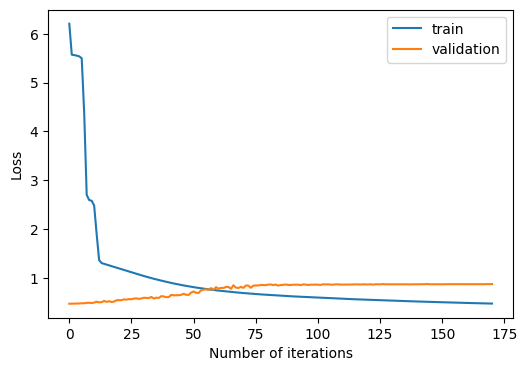

In [68]:
nn_clf = MLPClassifier(hidden_layer_sizes=(64),
                    activation='relu',
                    solver='adam',
                    alpha=0,
                    learning_rate_init=1e-5,
                    max_iter=1000,
                    n_iter_no_change=25,
                    random_state=1,
                    early_stopping=True)
nn_clf.fit(X_tr, y_tr)

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(nn_clf.loss_curve_,label="train")
ax.plot(nn_clf.validation_scores_,label="validation")
ax.legend() 
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Loss')

print('Training accuracy: ', round(nn_clf.score(X_tr, y_tr), 2))
print('Testing accuracy: ', round(nn_clf.score(X_test, y_test), 2))

Training accuracy:  0.8710572147326324
Testing accuracy:  0.8977063452201574


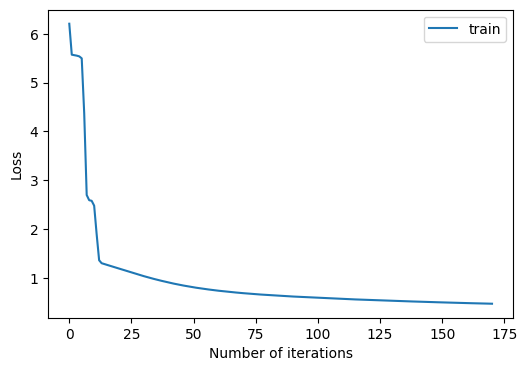

In [64]:
nn_clf = MLPClassifier(hidden_layer_sizes=(64),
                    activation='relu',
                    solver='adam',
                    alpha=0,
                    learning_rate_init=1e-5,
                    max_iter=1000,
                    n_iter_no_change=25,
                    random_state=1,
                    early_stopping=True)
nn_clf.fit(X_tr, y_tr)

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(nn_clf.loss_curve_,label="train")
# ax.plot(nn_clf.validation_scores_,label="validation")
ax.legend() 
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Loss')

print('Training accuracy: ', nn_clf.score(X_tr, y_tr))
print('Testing accuracy: ', nn_clf.score(X_test, y_test))

Training accuracy:  0.8919133931067106
Testing accuracy:  0.9116022099447514


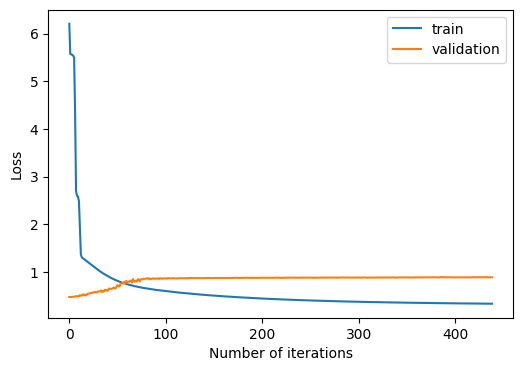

In [49]:
nn_clf = MLPClassifier(hidden_layer_sizes=(64),
                    activation='relu',
                    solver='adam',
                    alpha=0,
                    learning_rate_init=1e-5,
                    max_iter=100,
                    n_iter_no_change=25,
                    random_state=1,
                    early_stopping=True)
nn_clf.fit(X_tr, y_tr)

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(nn_clf.loss_curve_,label="train")
ax.plot(nn_clf.validation_scores_,label="validation")
ax.legend() 
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Loss')

print('Training accuracy: ', nn_clf.score(X_tr, y_tr))
print('Testing accuracy: ', nn_clf.score(X_test, y_test))